# Sentiment Analysis

In [1]:
# importing libraries
import json
import pandas as pd

In [2]:
# Path to the JSON file
file_path = 'yelp_academic_dataset_review.json'

In [3]:
# Initialize an empty list to store the data
data = []

# Open the file and read line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i < 100000:  # Read only the first 500001 lines
            data.append(json.loads(line))
        else:
            break

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.describe()

,stars,useful,funny,cool
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.842910,0.898980,0.257180,0.347030
std,1.354729,2.205186,1.010212,1.066382
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,320.000000,98.000000,49.000000


In [4]:
business_file_path = 'yelp_academic_dataset_business.json'


In [5]:
def load_filtered_data(file_path, columns):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            json_data = json.loads(line)
            filtered_data = {key: json_data[key] for key in columns if key in json_data}
            data.append(filtered_data)
    return pd.DataFrame(data)

In [6]:
business_columns = ['business_id', 'name', 'address', 'city', 'state']
business_df = load_filtered_data(business_file_path, business_columns)

In [7]:
merged_df = pd.merge(df, business_df, on='business_id', how='left')

In [8]:
merged_df = merged_df.drop(['review_id', 'user_id', 'business_id'], axis=1)

In [9]:
pd.set_option('display.max_colwidth', None)  # None means no truncation
pd.set_option('display.width', 1000)
merged_df['text']

0                                                                                                                                                                                                                                                                                                                                      If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.
1        I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to

In [10]:
print(merged_df)

       stars  useful  funny  cool                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               text                 date                            name                   address           city state
0        3.0       0      0    

In [11]:
# Importing necessary libraries
import pandas as pd
import nltk
from textblob import TextBlob

# Downloading NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/Premi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Premi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Premi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Data
# merged_df['text']

# Function to map POS tags from NLTK to WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN  # default to noun if not found

# Tokenization and sentiment analysis function
def analyze_sentiment(text):
    # Tokenization and POS tagging (using NLTK)
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)

    # Lemmatization (using NLTK)
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag)) for token, tag in tags]

    # Join lemmatized tokens back into a string
    clean_text = ' '.join(lemmatized_tokens)

    # Sentiment analysis using TextBlob
    blob = TextBlob(clean_text)
    sentiment_score = blob.sentiment.polarity

    return sentiment_score

# Function to map sentiment score to sentiment category
def interpret_sentiment(score):
    if score >= 0.50:
        return "Positive"
    elif score <= 0.20:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the text column and create a new column for sentiment score
merged_df['sentiment_scores'] = merged_df['text'].apply(analyze_sentiment)

# Map sentiment scores to sentiment categories
merged_df['sentiment_category'] = merged_df['sentiment_scores'].apply(interpret_sentiment)

# Display the DataFrame
merged_df.head()

,stars,useful,funny,cool,text,date,name,address,city,state,sentiment_scores,sentiment_category
0,3.0,0,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",2018-07-07 22:09:11,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,0.102121,Negative
1,5.0,1,0,1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",2012-01-03 15:28:18,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl",Philadelphia,PA,0.402273,Neutral
2,3.0,0,0,0,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",2014-02-05 20:30:30,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,0.139935,Negative
3,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",2015-01-04 00:01:03,Zaika,2481 Grant Ave,Philadelphia,PA,0.380051,Neutral
4,4.0,1,0,1,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines.",2017-01-14 20:54:15,Melt,2549 Banks St,New Orleans,LA,0.385659,Neutral


In [13]:
# !pip install textblob


In [14]:
merged_df.head()

,stars,useful,funny,cool,text,date,name,address,city,state,sentiment_scores,sentiment_category
0,3.0,0,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",2018-07-07 22:09:11,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,0.102121,Negative
1,5.0,1,0,1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",2012-01-03 15:28:18,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl",Philadelphia,PA,0.402273,Neutral
2,3.0,0,0,0,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",2014-02-05 20:30:30,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,0.139935,Negative
3,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",2015-01-04 00:01:03,Zaika,2481 Grant Ave,Philadelphia,PA,0.380051,Neutral
4,4.0,1,0,1,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines.",2017-01-14 20:54:15,Melt,2549 Banks St,New Orleans,LA,0.385659,Neutral


In [15]:
# Showing necessary columns
result_df = merged_df[['name', 'text', 'stars', 'sentiment_scores', 'sentiment_category']]

# Display the first few rows of the result DataFrame
result_df.head(20)

,name,text,stars,sentiment_scores,sentiment_category
0,Turning Point of North Wales,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",3.0,0.102121,Negative
1,Body Cycle Spinning Studio,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",5.0,0.402273,Neutral
2,Kettle Restaurant,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",3.0,0.139935,Negative
3,Zaika,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",5.0,0.380051,Neutral
4,Melt,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines.",4.0,0.385659,Neutral
5,Dmitri's,I am a long term frequent customer of this establishment. I just went in to order take out (3 apps) and was told they're too busy to do it. Really? The place is maybe half full at best. Does your dick reach your ass? Yes? Go fuck yourself! I'm a frequent customer AND great tipper. Glad that Kanella just opened. NEVER going back to dmitris!,1.0,0.187179,Negative
6,The Voodoo Bone Lady Tours,"Loved this tour! I grabbed a groupon and the price was great. It was the perfect way to explore New Orleans for someone who'd never been there before and didn't know a lot about the history of the city. Our tour guide had tons of interesting tidbits about the city, and I really enjoyed the experience. Highly recommended tour. I actually thought we were just going to tour through the cemetery, but she took us around the French Quarter for the first hour, and the cemetery for the second half of the tour. You'll meet up in front of a grocery store (seems strange at first, but it's not terribly hard to find, and it'll give you a chance to get some water), and you'll stop at a visitor center part way through the tour for a bathroom break if needed. This tour was one of my favorite parts of my trip!",5.0,0.270346,Neutral
7,Fries Rebellion,"Amazingly amazing wings

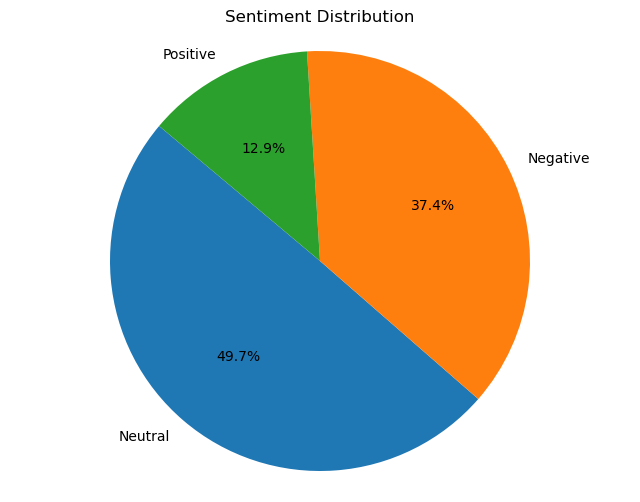

In [16]:
import matplotlib.pyplot as plt

# Counting occurrences of each sentiment category
sentiment_counts = merged_df['sentiment_category'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio is ensuring us that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()


<Figure size 1000x600 with 0 Axes>

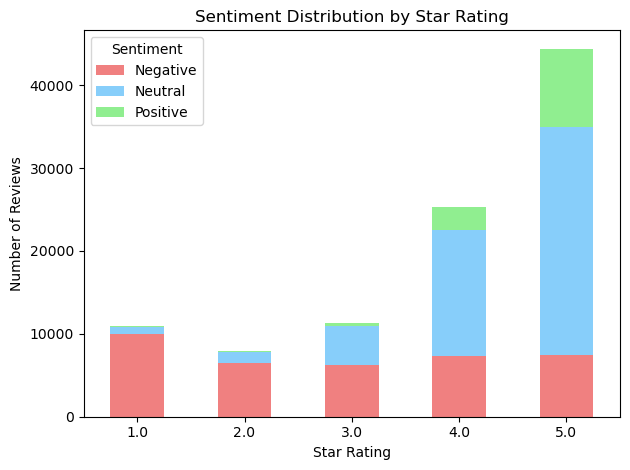

In [17]:
# Grouping the data by star ratings and sentiment categories, and count the occurrences
grouped_data = merged_df.groupby(['stars', 'sentiment_category']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))
colors = {'Positive': 'lightgreen', 'Neutral': 'lightskyblue', 'Negative': 'lightcoral'}
grouped_data.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_data.columns])
plt.title('Sentiment Distribution by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [18]:
# Finding the maximum and minimum sentiment score
max_sentiment_score = merged_df['sentiment_scores'].max()
min_sentiment_score = merged_df['sentiment_scores'].min()

print("Maximum sentiment score:", max_sentiment_score)
print("Minimum sentiment score:", min_sentiment_score)


Maximum sentiment score: 1.0
Minimum sentiment score: -1.0


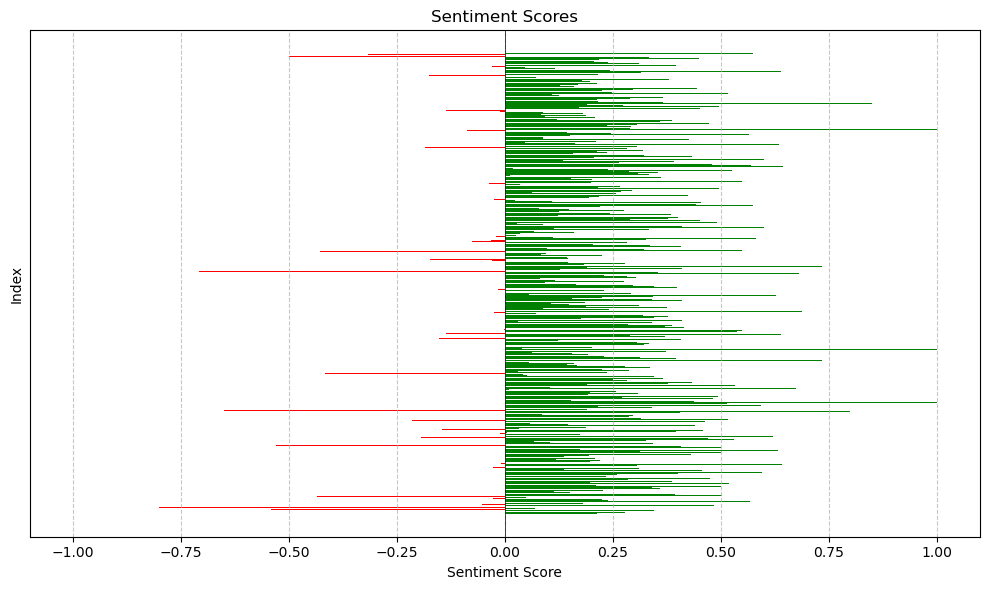

In [19]:
import matplotlib.pyplot as plt

# Plotting a diverging bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df.index, merged_df['sentiment_scores'], color=['red' if score < 0 else 'green' for score in merged_df['sentiment_scores']])
plt.axvline(x=0, color='black', linewidth=0.5)  # Add a vertical line at the zero point
plt.title('Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Index')
plt.yticks([])  # Hide y-axis labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


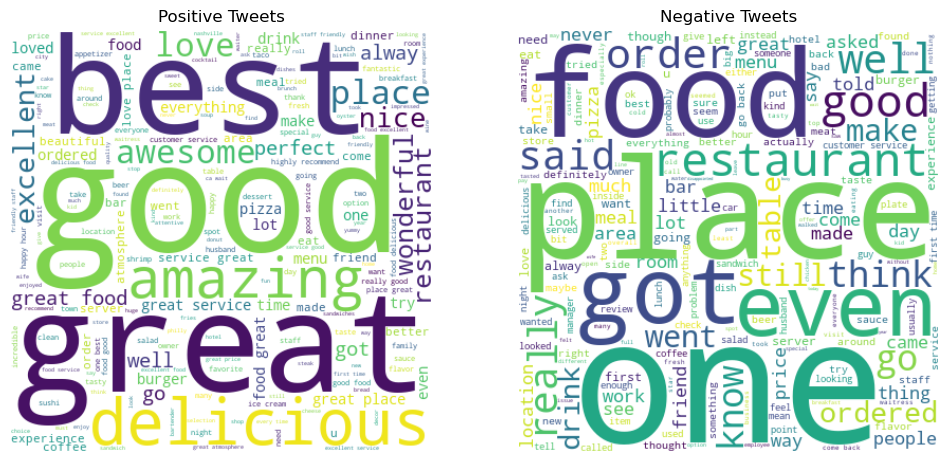

In [20]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

# Filter positive and negative tweets
positive_tweets = merged_df[merged_df['sentiment_category'] == 'Positive']['text']
negative_tweets = merged_df[merged_df['sentiment_category'] == 'Negative']['text']

# Combine all positive and negative tweets into single strings
all_positive_tweets = ' '.join(positive_tweets)
all_negative_tweets = ' '.join(negative_tweets)

# Tokenize the text for positive and negative tweets
positive_words = word_tokenize(all_positive_tweets)
negative_words = word_tokenize(all_negative_tweets)

# Remove stopwords for positive and negative tweets
stop_words = set(stopwords.words('english'))
filtered_positive_words = [word.lower() for word in positive_words if word.isalpha() and word.lower() not in stop_words]
filtered_negative_words = [word.lower() for word in negative_words if word.isalpha() and word.lower() not in stop_words]

# Join the filtered words back into strings for positive and negative tweets
filtered_positive_text = ' '.join(filtered_positive_words)
filtered_negative_text = ' '.join(filtered_negative_words)

# Generate WordClouds for positive and negative tweets
wordcloud_positive = WordCloud(width=400, height=400, background_color='white').generate(filtered_positive_text)
wordcloud_negative = WordCloud(width=400, height=400, background_color='white').generate(filtered_negative_text)

# Plot the WordClouds side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Tweets')
plt.axis('off')

plt.show()

In [21]:
# Model Generation

In [22]:
# seperating input feature and label

In [23]:
X=merged_df.text
y=merged_df.sentiment_category

In [24]:
merged_df['sentiment_category'].nunique()

3

In [25]:
# splitting the datset into train and test subsets
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target variables respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)


In [26]:
#Transforming the Dataset Using TF-IDF Vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectorizer.fit(X_train)
print('No. of feature_words:', len(vectorizer.get_feature_names_out()))


No. of feature_words: 500000


In [28]:
#Transform the data using TF-IDF Vectorizer

In [29]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [30]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


# Model 1: Bernoulli Naive Bayes Classifier

In [31]:
from sklearn.metrics import classification_report

# Now you can use classification_report


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
import numpy as np
def model_Evaluate(model, X_test, y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cf_matrix)
    print()

# Example usage

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel, X_test, y_test)


              precision    recall  f1-score   support

    Negative       0.71      0.51      0.60      1870
     Neutral       0.66      0.59      0.62      2479
    Positive       0.34      0.76      0.47       651

    accuracy                           0.58      5000
   macro avg       0.57      0.62      0.56      5000
weighted avg       0.64      0.58      0.59      5000

Confusion Matrix:
[[ 962  595  313]
 [ 385 1452  642]
 [   1  153  497]]



              precision    recall  f1-score   support

    Negative       1.00      0.51      0.68      1870
     Neutral       0.00      0.00      0.00         0
    Positive       0.61      0.76      0.68       651

    accuracy                           0.58      2521
   macro avg       0.54      0.43      0.45      2521
weighted avg       0.90      0.58      0.68      2521



/Users/Premi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Premi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Premi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


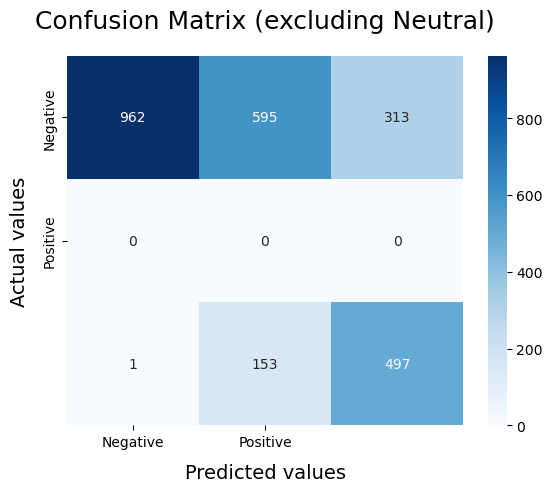

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def model_Evaluate(model, X_test, y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Remove Neutral class from y_test and y_pred
    y_test_no_neutral = y_test[y_test != 'Neutral']
    y_pred_no_neutral = y_pred[y_test != 'Neutral']
    # Print the evaluation metrics for the dataset (excluding Neutral)
    print(classification_report(y_test_no_neutral, y_pred_no_neutral))
    # Compute confusion matrix (excluding Neutral)
    cf_matrix = confusion_matrix(y_test_no_neutral, y_pred_no_neutral)
    # Plot confusion matrix (excluding Neutral)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted values', fontsize=14, labelpad=10)
    plt.ylabel('Actual values', fontsize=14, labelpad=10)
    plt.title('Confusion Matrix (excluding Neutral)', fontsize=18, pad=20)
    plt.show()

# Example usage
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel, X_test, y_test)


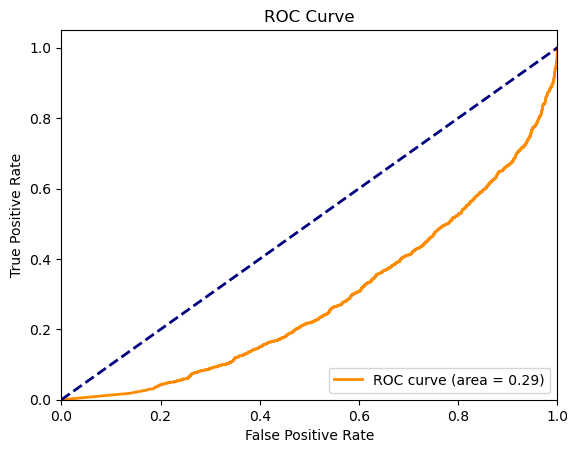

In [34]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    # Remove Neutral class from y_test
    y_test_binary = (y_test != 'Neutral').astype(int)
    
    # Calculate probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
plot_roc_curve(BNBmodel, X_test, y_test)


# Model 2: SVM (Support Vector Machine)

              precision    recall  f1-score   support

    Negative       0.88      0.85      0.87      1870
     Neutral       0.79      0.90      0.84      2479
    Positive       0.86      0.53      0.65       651

    accuracy                           0.83      5000
   macro avg       0.85      0.76      0.79      5000
weighted avg       0.84      0.83      0.83      5000



/Users/Premi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


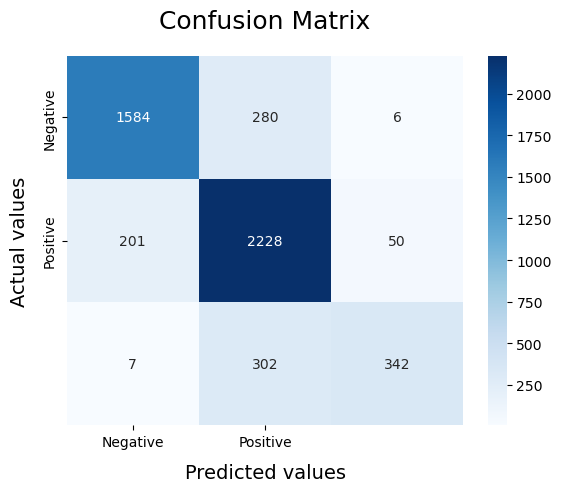

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def model_Evaluate(model, X_test, y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))
    # Compute confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted values', fontsize=14, labelpad=10)
    plt.ylabel('Actual values', fontsize=14, labelpad=10)
    plt.title('Confusion Matrix', fontsize=18, pad=20)
    plt.show()

# Example usage
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel, X_test, y_test)
